In [1]:
#default_exp inference.predict

In [1]:
#export
import PIL

from fastai.vision.all import *
from PIL import ImageDraw, ImageFont

In [10]:
#export
color = lambda r,g,b: f'rgb({r},{g},{b})'

@patch
def draw_labels(
    self:PIL.Image.Image,
    labels:list,
    font_size:float=None,
    font_color:Union[tuple,int] = (220,220,220),
    font_path:str  = '../fonts/DIN Alternate Bold.ttf',
    #font_path:str  = None,
    location:str   = 'bottom',
    draw_rect:bool = False,
    fsize_div_factor:int = 32
    ) -> PIL.Image.Image:
    """Draw `labels` on top of `img`
    
    * labels: The text that will be "drawn" on the image. Can be a
              list of strings as well
    * font_size: Explicitly set font-size. Not recommended.
                 See `fsize_div_factor` to scale font size proportionately
    * font_color: An int or tuple of RGB color values
    * font_path: Path to the font file (tested with `.ttf`)
    * location: Where to draw the text? Any combination of
                {bottom,top} + {right,left} where {bottom,top}
                are mandatory
    * draw_rect: Draw a black rectangle behind the text for clarity
    * fsize_div_factor: Set font size to img.width/fsize_div_factor
                        Font size is smaller for larger values
    """
    img = self # this allows us to easily pull out the function without `@patch` support
    draw = ImageDraw.Draw(img)
    if font_path is not None:
        if not Path(font_path).exists: raise FileNotFoundError(f"Couldn't find font file @ {font_path}")
    if font_size is None: font_size = int(img.width/fsize_div_factor)
    if font_path is not None:
        font = ImageFont.truetype(font_path, size=font_size)
    else:
        font = ImageFont.load_default()
        warnings.warn("Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked")
    
    fcolor = color(*font_color)
    # Check for valid locations
    valid_locations = ['bottom', 'bottom-right', 'bottom-left',
                       'top', 'top-right', 'top-left']
    if not location in valid_locations: raise ValueError(f"`location` must contain 'bottom' or 'top', got {location}")
    
    # Convert labels to drawable format
    if isinstance(labels, str): labels = [labels]
    if 'top' in location: labels = ['\n'.join(labels)]
    
    # Draw rectangle if asked for
    if draw_rect:
        #rect_x, rect_y
        if 'bottom' in location:
            rect_x = (0,img.height-(1.1*len(labels)*font_size*1.25))
            rect_y = (img.width,img.height)
        if 'top' in location:
            rect_x = (img.width,0)
            rect_y = (0, 1.1*len(labels)*font_size*1.25)
        draw.rectangle(xy=(rect_x, rect_y), fill='black')
    
    for i,label in enumerate(list(reversed(labels))):
        if 'bottom' in location or 'top' in location:
            w,h = draw.textsize(label, font)
            
        if 'bottom' in location:
            height = img.height-((i+1)*font_size*1.3)
        
        elif 'top' in location:
            height = img.height*0.01
        
        if location=='bottom' or location=='top': xy = ( (img.width - w)/2, height)            
        elif '-right' in location: xy = ( ((img.width - (w+img.width*0.01))), height )
        elif '-left' in location:  xy = ( img.width*0.01 , height )
        else:
            if i==0: y=1
            else:    y=(i*font_size*1.5)
            xy = (10,y) 

        # thin border
        x,y = xy[0],xy[1]
        draw.text((x-1, y), label, font=font, fill='black')
        draw.text((x+1, y), label, font=font, fill='black')
        draw.text((x, y-1), label, font=font, fill='black')
        draw.text((x, y+1), label, font=font, fill='black')

        # thicker border
        draw.text((x-1, y-1), label, font=font, fill='black')
        draw.text((x+1, y-1), label, font=font, fill='black')
        draw.text((x-1, y+1), label, font=font, fill='black')
        draw.text((x+1, y+1), label, font=font, fill='black')
        
        draw.text(xy, text=label, fill=fcolor, font=font)
    return img

In [11]:
from nbdev.showdoc import *
show_doc(PILImage.draw_labels)

<h4 id="Image.draw_labels" class="doc_header"><code>Image.draw_labels</code><a href="__main__.py#L4" class="source_link" style="float:right">[source]</a></h4>

> <code>Image.draw_labels</code>(**`labels`**:`list`, **`font_size`**:`float`=*`None`*, **`font_color`**:`Union`\[`tuple`, `int`\]=*`(220, 220, 220)`*, **`font_path`**:`str`=*`'../fonts/DIN Alternate Bold.ttf'`*, **`location`**:`str`=*`'bottom'`*, **`draw_rect`**:`bool`=*`False`*, **`fsize_div_factor`**:`int`=*`32`*)

```
Draw `labels` on top of `img`

* labels: The text that will be "drawn" on the image. Can be a
          list of strings as well
* font_size: Explicitly set font-size. Not recommended.
             See `fsize_div_factor` to scale font size proportionately
* font_color: An int or tuple of RGB color values
* font_path: Path to the font file (tested with `.ttf`)
* location: Where to draw the text? Any combination of
            {bottom,top} + {right,left} where {bottom,top}
            are mandatory
* draw_rect: Draw a black rectangle behind the text for clarity
* fsize_div_factor: Set font size to img.width/fsize_div_factor
                    Font size is smaller for larger values
```

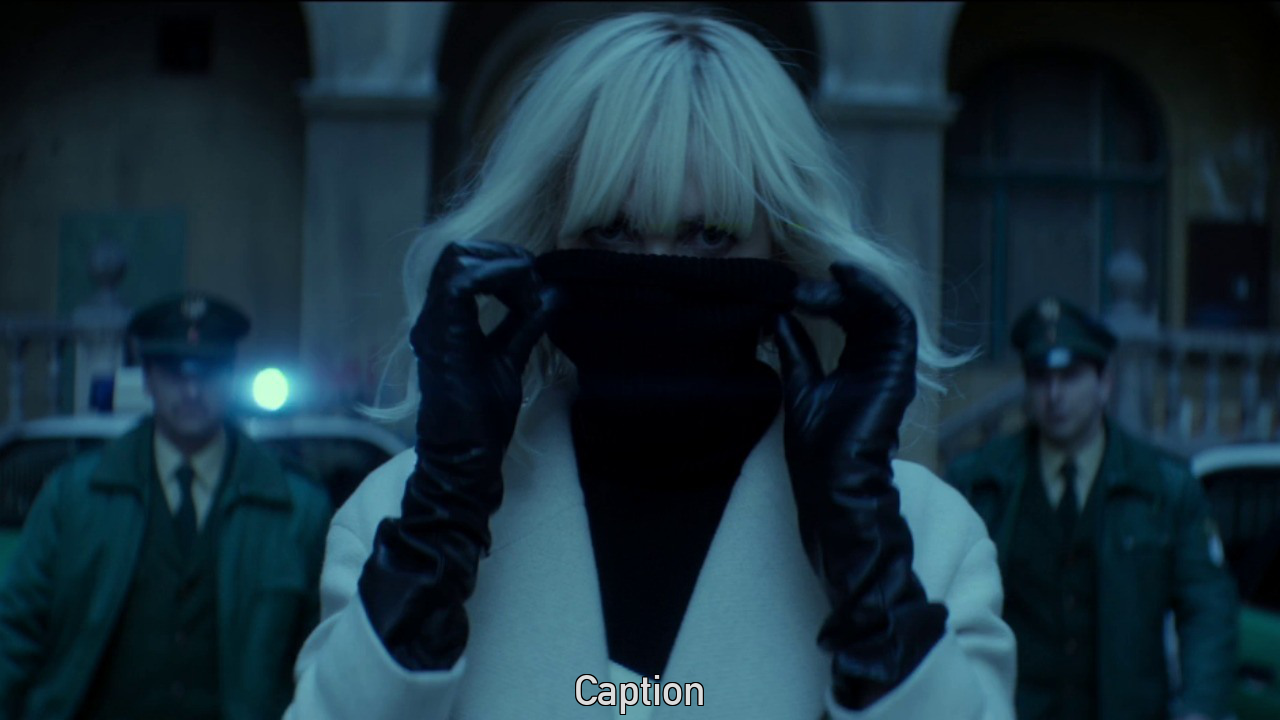

In [12]:
img = PIL.Image.open("../assets/imgs/atomic-blonde.jpg")
img.draw_labels(['Caption'], location='bottom', fsize_div_factor=30)

/home/synopsis/miniconda3/envs/torch17/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custom font as the default font's size cannot be tweaked


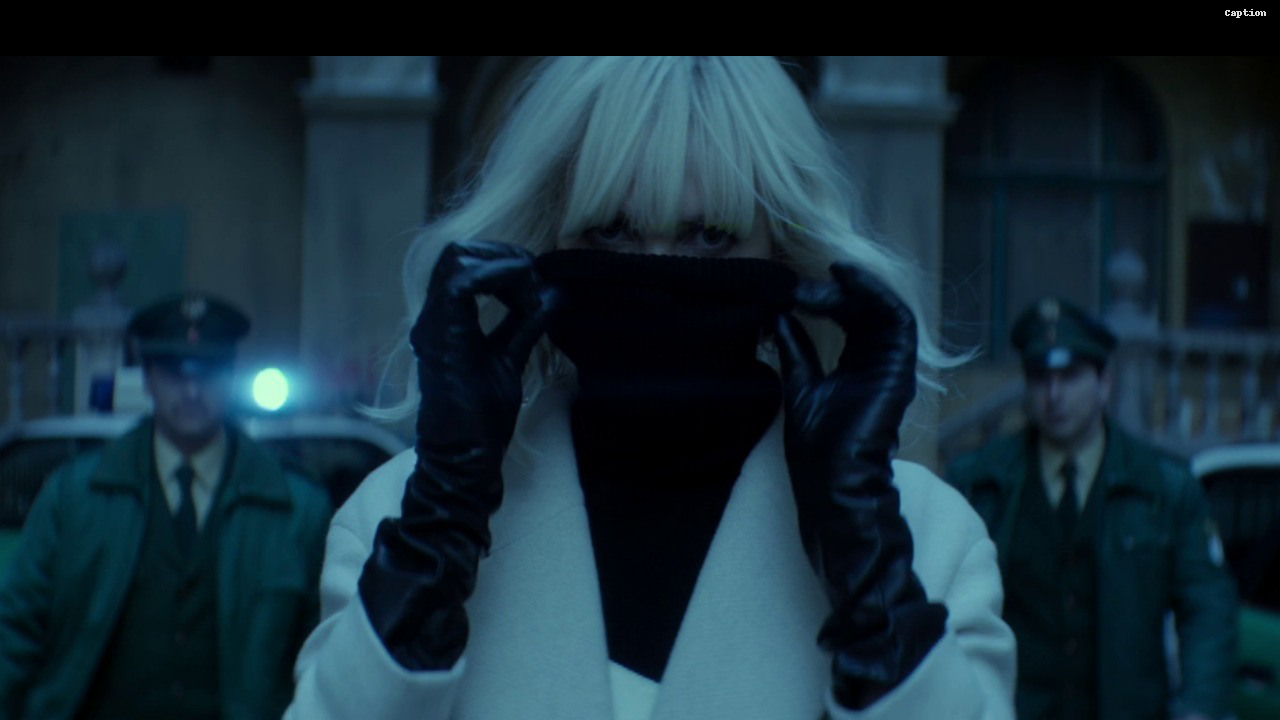

In [13]:
img = PIL.Image.open("../assets/imgs/atomic-blonde.jpg")
img.draw_labels(['Caption'], location='top-right', draw_rect=True, font_path=None)

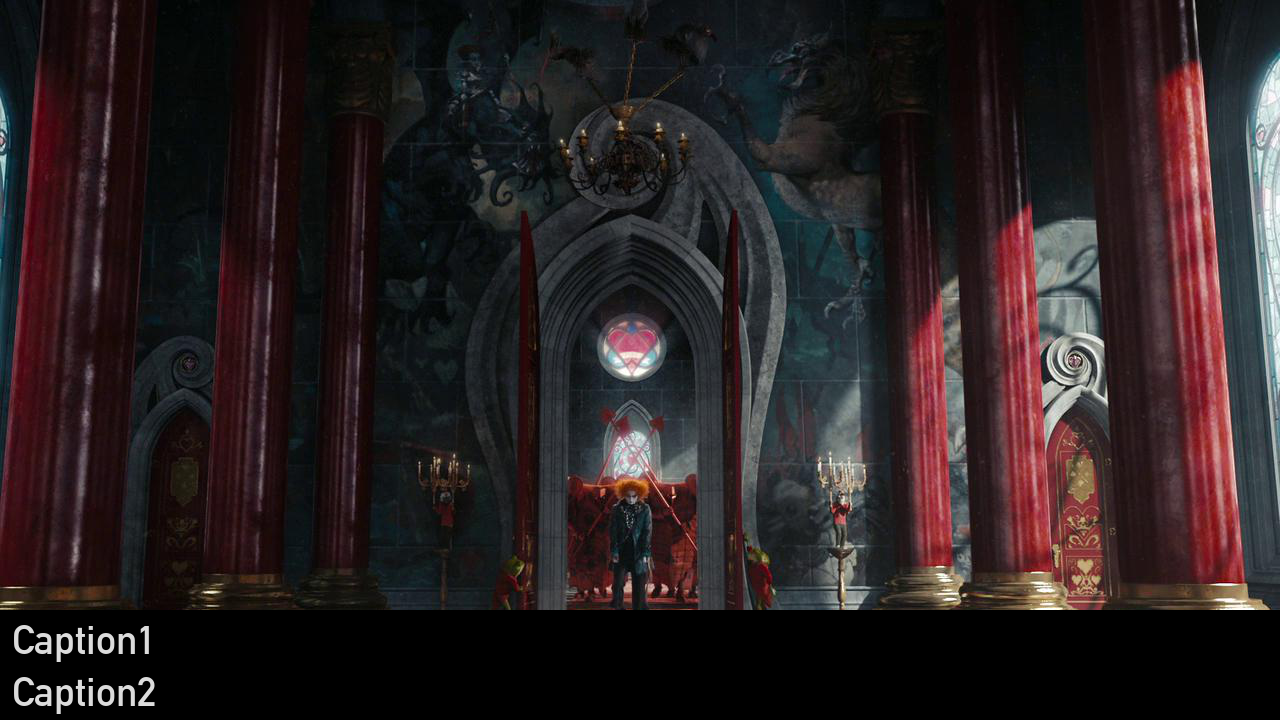

In [14]:
img = PILImage.create("../assets/imgs/alice-in-wonderland.jpg")
img.draw_labels(['Caption1', 'Caption2'], location='bottom-left', draw_rect=True)

### Export

In [15]:
from nbdev.export import *
notebook2script('inference_pretty-predict.ipynb')

Converted inference_pretty-predict.ipynb.
